# Intro to Advanced ML: Week 3 - Outliers

## Agenda:


*   Load dataset + simple data info/describe
*   Principal Component Analysis
*   Linear Discriminant Analysis



### Dataset Information & Loading the Dataset


A website with a wealth of datasets is the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/index.php). One of these is the Iris Dataset, which is perhaps the best known database to be found in the pattern recognition literature and aims to classify the class of the given Iris plant. 

Note: refer to this website for more information on the dataset - 


The dataset (zip file) can be downloaded from this URL -- https://archive.ics.uci.edu/ml/datasets/iris




#### Load dataset

Steps to access, download, and use the dataset:

Access the above link, click on "iris.data" to download 

1.   Access the above link, and download "iris.data", the dataset.
2.   Once downloaded, click on the file to unzip it and save the file in a folder that is easily accessible, for example: "Documents"
3.   Open a Google Colab Notebook.
4.   In the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
5.   You now are ready to start using the data in the Colab Notebook!



Data location within Colab: '/content/iris.data'

How to check which folder the google colab is located in?

In [ ]:
pwd

'/content'

Now that we know which folder, how to see if the data we loaded in Step 4 above is correctly loaded or not?

In [ ]:
ls

iris.data  sample_data/


Now, we can load in the dataset as a Pandas dataframe. You may be familiar with this, but the Pandas library actually makes this a simple task and we must first import Pandas. 

In [ ]:
import pandas as pd

With Pandas imported, we can now load in the dataset using the .read_csv function of Pandas. We will also specify the columns we would like, specifically sepal length, sepal width, petal length, petal width, and target.

In [ ]:
iris = pd.read_csv('/content/iris.data', names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [ ]:
nRow, nCol = iris.shape
print(f'There are {nRow} rows and {nCol} columns')

iris.head()

There are 150 rows and 5 columns


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Describe the data + more information on the dataset

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's also do some quick EDA (exploratory data analysis)!

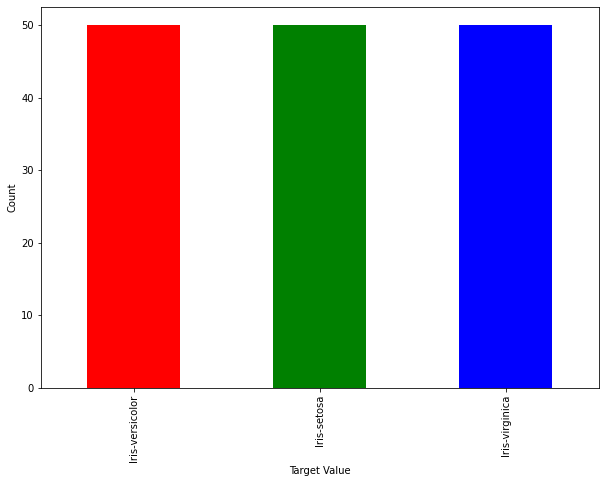

In [ ]:
import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Target Value")
plt.ylabel("Count")

iris.target.value_counts().plot(kind='bar', color=color_list)

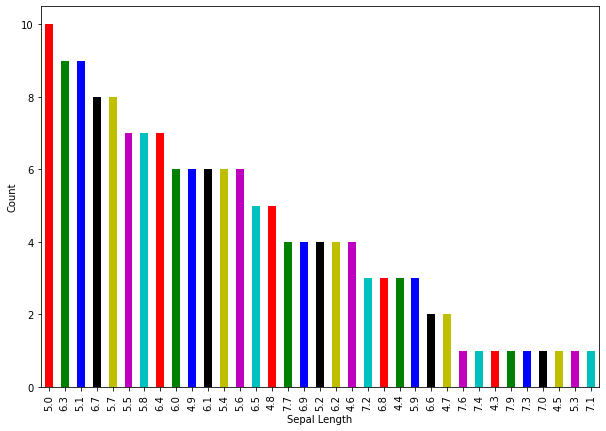

In [ ]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Sepal Length")
plt.ylabel("Count")

iris.sepal_length.value_counts().plot(kind='bar', color=color_list)

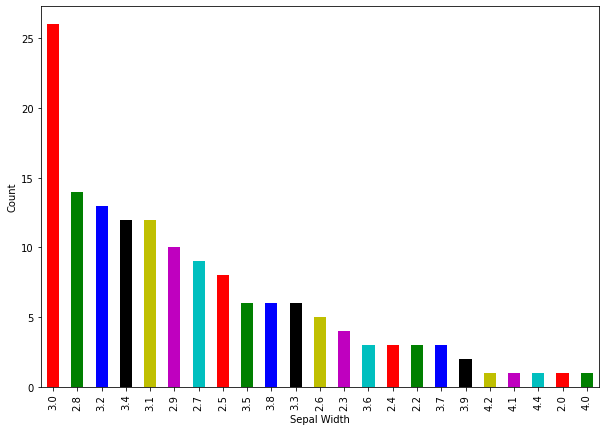

In [ ]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Sepal Width")
plt.ylabel("Count")

iris.sepal_width.value_counts().plot(kind='bar', color=color_list)

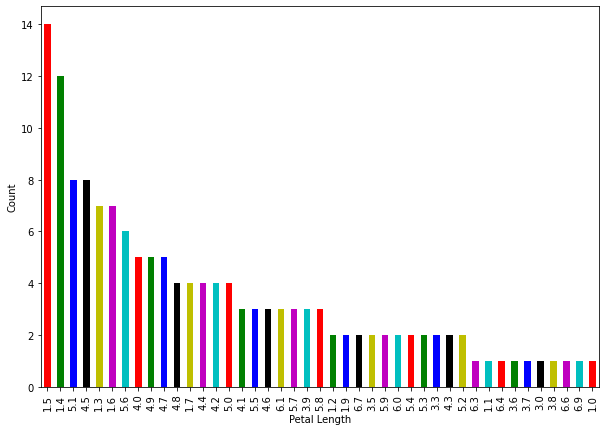

In [ ]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Petal Length")
plt.ylabel("Count")

iris.petal_length.value_counts().plot(kind='bar', color=color_list)

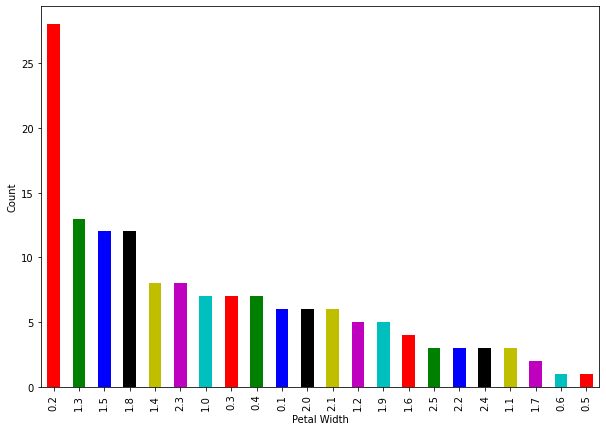

In [ ]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Petal Width")
plt.ylabel("Count")

iris.petal_width.value_counts().plot(kind='bar', color=color_list)

#### Now, we must execute some pre-processing on the dataset before we jump into outlier detection.

First step of preprocessing: divide the dataset into a feature set and corresponding labels. Below, we store the feature sets into the X variable and the series of corresponding labels in to the y variable.

In [ ]:
X = iris.drop('target', 1)
y = iris['target']

Next, we divide our data into training and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

PCA is affected by scale, therefore you need to scale the features in your data before applying PCA. Therefore, we will use 'StandardScaler' to help you standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Below is the array x (visualized by a pandas dataframe) before and after standardization:

![Scaling](https://miro.medium.com/max/1400/1*Qxyo-uDrmsUzdxIe7Nnsmg.png)



---



---



Now, let's jump into the main focus for today: outlier detection aka anomaly detection. We will start out with PCA and then implement LDA.

### Outlier Detection: Principal Component Analysis (PCA)

We will leverage scikit-learn's built-in PCA library (the PCA class is used for this purpose). PCA depends only upon the feature set and not the label data, therefore it can be considered as an unsupervised machine learning technique. 

Performing PCA can be seen as a two-step process:


1.   Initialize the PCA class by passing the number of components to the constructor.
2.   Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.



Below, we create a PCA object named pca. We did not specify the number of components in the constructor. Hence, all four of the features in the feature set will be returned for both the training and test sets

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Explained Variance: The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4-dimensional space to 2-dimensional space, you can potentially lose some of the variance (information) when you do this.

In [ ]:
pca.explained_variance_ratio_

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.22% of the variance and the second principal component contains 23.97% of the variance. Together, the two components contain 95.80% of the information.

Now let's try to use 1 principal component to train our algorithm:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Train and Make Predictions: use the Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Evaluation: Accuracy & Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy:  0.9333333333333333


Therefore, the Random Forest algorithm is able to correctly predict 28 out of 30 instances, resulting in 93.33% accuracy. 



---



---



### Outlier Detection: Linear Discriminant Analysis (LDA)

In [ ]:
import numpy as np

Pre-Processing: divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. Below, we assign the first four columns of the dataset i.e. the feature set to X variable, while the values in the fifth column (labels) are assigned to the y variable.

In [ ]:
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

Next, we divide the data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling (just like we did for PCA):

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We will again leverage scikit-learn to perform LDA: 


*   The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis library can be used to perform LDA in Python, we import it as LDA
*   We have to pass the value for the n_components parameter of the LDA (which refers to the number of linear discriminates that we want to retrieve). In this case, we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant.
*   Finally, we execute the fit and transform methods to actually retrieve the linear discriminants. 
*   In the case of LDA, the transform method takes two parameters: the X_train and the y_train. However, in the case of PCA, the transform method only required one parameter (i.e. X_train). This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA does no depend upon the output labels.



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Train and Make Predictions: use the same Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Evaluation: Accuracy & Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


To wrap up, PCA vs. LDA: what to choose for dimensionality reduction?



*   In case of uniformly distributed data, LDA almost always performs better than PCA. 
*   However, if the data is highly skewed (irregularly distributed), then it is advised to use PCA since LDA can be biased towards the majority class.
*   Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels.
*   On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.



## References:



*   https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

*   https://github.com/bot13956/linear-discriminant-analysis-iris-dataset
*   https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/


